In [130]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression
from patsy import dmatrix


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


Shape of dataframe is:  (4238, 16)


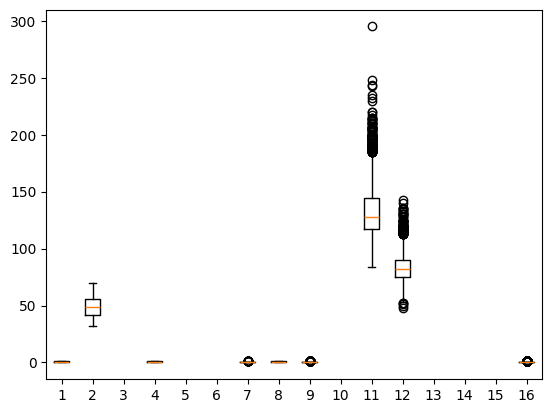

In [159]:
df = pd.read_csv("heart_disease_data.csv")
display(df.head())
print('Shape of dataframe is: ',df.shape)
fig = plt.boxplot(df)

### Question 3
* There are 4238 observations in the dataset with 16 variables for each observation. 
* The dataset columns 1, 4, 7, 8, 9 and 16 are categorical variables. We know this because the box plot shows that they have a value around 0/1. 
* Dataset columns 2, 3, 5, 6, 10, 11, 12, 13, 14, 15 are continuous variables. Note that columns 3, 5, 10, 14 and 15 cannot be seen since the y scale being too large.
* Related to the previous point, the data all has different scales meaning that it may need to be normalized in next steps.

### Question 4

In [133]:
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


#### Categorical Variables
* Descriptions for the categorical variables (male, currentSmoker, prevalentStroke, prevalentHyp, diabetes, and TenYearCHD) have been confirmed using the documentation on the Kaggle page associated with this dataset. Each categorical value has a 0/1 depending on whether that variable is true for the observation. For example, a 0 in the male column means the observation is not male (i.e. female). Likewise, a 1 in the currentSmoker column indicates that person is a smoker
* The columns prevalentStroke and prevalentHyp indicate whether the patient had previously had a stroke and was hypertensive respectively. 
* The column TenYearCHD indicates the 10 year risk of coronary heart disease (CHD), a 1 indicates yes.

#### Continuous Variables
* As stated in the previous question, the continuous columns have different scales and therefore must be scaled before any analysis can be done on them. 
* The age of individuals in the study varies from 32 to 70 years old.

### Question 5

To look at this distribution, a function was constructed to quickly analyze the percentages of people who have a 10 year risk of CHD across various factors.

In [134]:
def bar_plot_distribution(distr_var, distr_label, distr_legend):
    # Grouping by 'male' and 'TenYearCHD', and calculating counts and percentages
    grouped = df.groupby(distr_var)['TenYearCHD'].value_counts(normalize=True).unstack() * 100

    # Plotting the bar plot
    ax = grouped.plot(kind='bar', stacked=True)

    # Adding labels and title
    ax.set_xlabel(distr_label)
    ax.set_ylabel('10 year risk of coronary heart disease [%]')
    ax.set_title('Percentage Distribution of TenYearCHD by '+ distr_label)

    # Showing the plot
    ax.legend(title='TenYearCHD', labels=['No', 'Yes'], bbox_to_anchor=(1.25, 1), loc='upper right')
    ax.set_xticks([i for i in range(len(distr_legend))])
    ax.set_xticklabels(distr_legend, rotation=0)
    plt.tight_layout()
    return ax

<Axes: title={'center': 'Percentage Distribution of TenYearCHD by Gender'}, xlabel='Gender', ylabel='10 year risk of coronary heart disease [%]'>

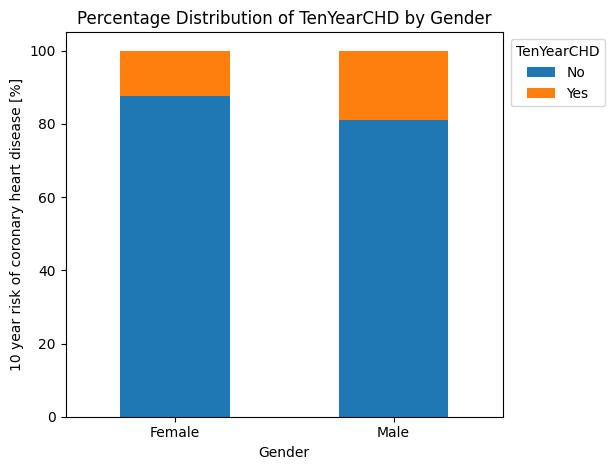

In [135]:
bar_plot_distribution('male', 'Gender', ['Female', 'Male'])

<Axes: title={'center': 'Percentage Distribution of TenYearCHD by History of Hypertension'}, xlabel='History of Hypertension', ylabel='10 year risk of coronary heart disease [%]'>

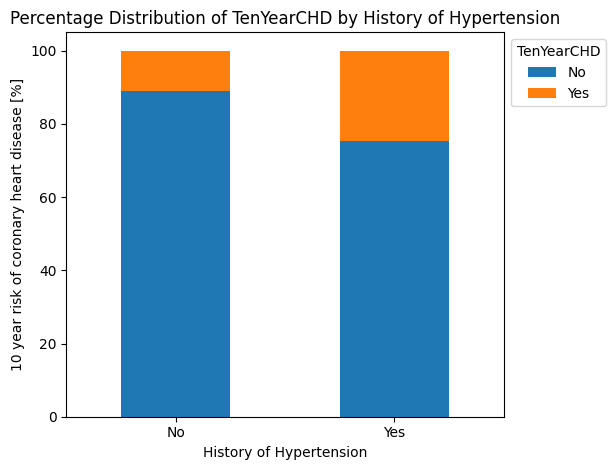

In [136]:
bar_plot_distribution('prevalentHyp', 'History of Hypertension', ['No', 'Yes'])

<Axes: title={'center': 'Percentage Distribution of TenYearCHD by Current Smoker'}, xlabel='Current Smoker', ylabel='10 year risk of coronary heart disease [%]'>

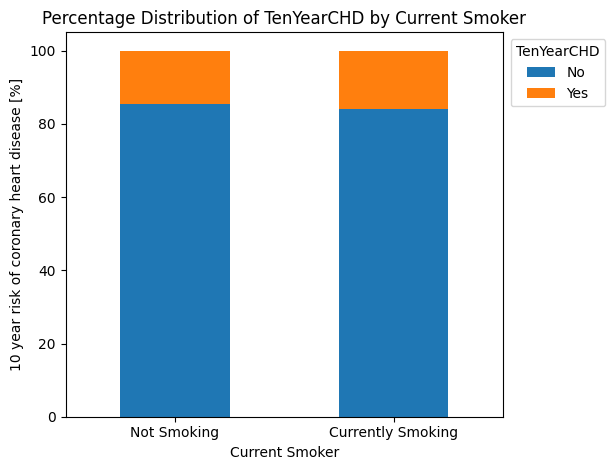

In [137]:
bar_plot_distribution('currentSmoker', 'Current Smoker', ['Not Smoking', 'Currently Smoking'])

<Axes: title={'center': 'Percentage Distribution of TenYearCHD by Education'}, xlabel='Education', ylabel='10 year risk of coronary heart disease [%]'>

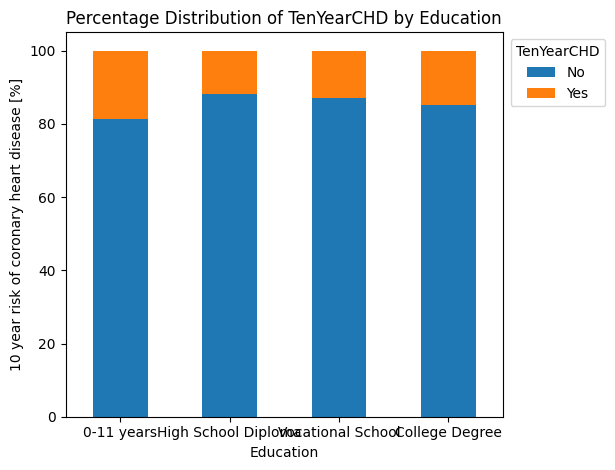

In [138]:
bar_plot_distribution('education', 'Education', ['0-11 years', 'High School Diploma', 'Vocational School', 'College Degree'])

From this set of plots, it is clear that:

* Those with hypertension have more diagnoses of a 10 year risk of CHD than any other individual risk factor.
* Males are slightly more likely to have more diagnoses of a 10 year risk of CHD than females.

### Question 6

In [139]:
print('Checking if there are any missing values:',str(any(df.isnull())))

Checking if there are any missing values: True


There are missing values in the dataframe. 

In [140]:
# Dropping missing rows
df = df.dropna()

### Question 7

In [141]:
# Scaling predictor variables
numerical_cols = df.select_dtypes(include=['float64']).columns
numerical_cols = numerical_cols.insert(0, 'age')
df_scaled = df.copy()
df_scaled[numerical_cols] = scale(df_scaled[numerical_cols])

### Question 8

In [142]:
# Assigning predictors and response variables
pred_vars = df_scaled.columns.tolist()[:-1]
resp_var = df_scaled.columns.tolist()[-1]

x = df_scaled[pred_vars]
y = df_scaled[resp_var]

# Splitting into 75%/25% training/test split with stratified random sampling
x_train, x_test, y_train, y_test = train_test_split(
    x, 
    y,
    test_size=0.25, 
    random_state=0, 
    stratify=y
    )

### Question 9

In [143]:
# Creating instance of the logistic regression
def_log = LogisticRegression()

### Question 10

In [144]:
# Training model
def_log = LogisticRegression(max_iter=30)  # minimum number of iterations to converge is 30

def_log.fit(x_train, y_train)
pred_prob = def_log.predict_proba(x_test)
predic_df = pd.DataFrame(
    data = {'prob': pred_prob[:, 1], 'y_test': y_test}
    )

### Question 11

Accuracy :  0.8522975929978118


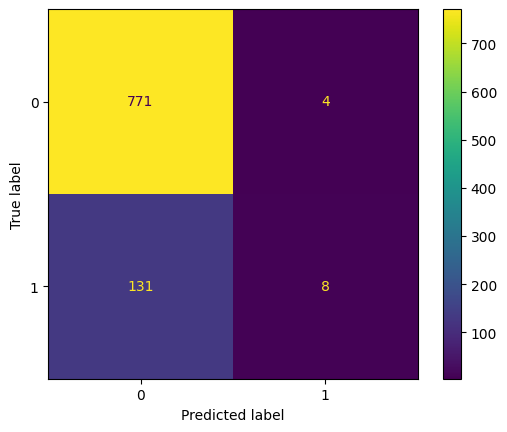

In [145]:
# Calculating accuracy of the model
predic_df['y_test_pred'] = predic_df.prob.map(lambda x: 1 if x>0.5 else 0)
cm = confusion_matrix(y_test, predic_df['y_test_pred'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

total = sum(sum(cm))

accuracy = (cm[0,0]+cm[1,1])/total
print ('Accuracy : ', accuracy)

The accuracy of the model is 85%. Overall, this means that the model is performing well especially when compared to just randomly guessing by flipping a coin (50%).

### Question 12

In [146]:
# Calculating sensitivity and specificity of the model
sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity )

specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity)

print(classification_report(predic_df.y_test, predic_df.y_test_pred))

Sensitivity :  0.9948387096774194
Specificity :  0.05755395683453238
              precision    recall  f1-score   support

           0       0.85      0.99      0.92       775
           1       0.67      0.06      0.11       139

    accuracy                           0.85       914
   macro avg       0.76      0.53      0.51       914
weighted avg       0.83      0.85      0.80       914



The sensitivity and specificity of the model are 99.5% and 5.8% respectively. The high sensitivity and low specificity means that the model tends to predict a positive result. As such, many negatives are incorrectly classified as positive (leading to a low specificity), and almost all positives are correctly classified (high sensitivity). Overall, the model tends to overpredict a positive result.

### Question 13

To improve the model we may want to change the probability cut-off tolerance used to assess positive and negatives. The high accuracy (85%) is excellent, however the confusion matrix implies that there are too many results being classified as positive.

### Question 14

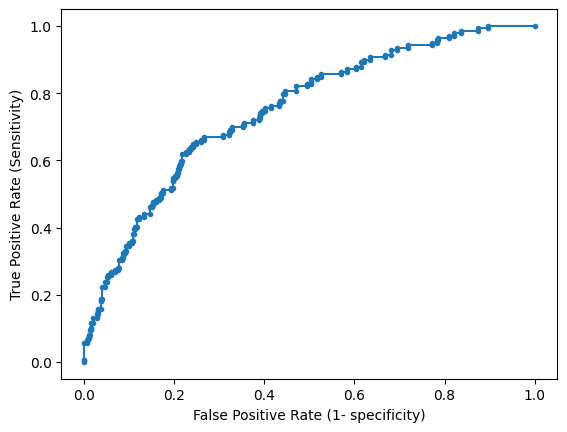

AUC:  0.7491575771640753


In [147]:
fpr, tpr, thresholds = roc_curve(predic_df.y_test, predic_df.prob)

# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.', label='Logistic')
plt.xlabel('False Positive Rate (1- specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

# AUC
print('AUC: ', roc_auc_score(predic_df.y_test, predic_df.prob))

Since we want to improve our sensitivity from the current 5%, we can assume an acceptable tolerance of  an FPR of 20%.

In [148]:
indices = np.where(np.isclose(fpr, 0.2, atol=0.002))[0][0]
print('To achieve an FPR of: ', fpr[indices], 'and TPR of: ', tpr[indices])
print('We need to use a probabilty threshold of: ', thresholds[indices])

To achieve an FPR of:  0.19870967741935483 and TPR of:  0.539568345323741
We need to use a probabilty threshold of:  0.19445657144562628


### Question 15

In [149]:
# Creating design matrix with predictor variables
X = dmatrix(
    'male + age + cigsPerDay + diabetes + sysBP + heartRate', 
    data=df_scaled, 
    return_type='dataframe'
    )

y = df_scaled['TenYearCHD']

# Generating training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0, stratify=y)

# Performing fit
log_reg = sm.Logit(y_train, X_train).fit()
log_reg.summary()

Optimization terminated successfully.
         Current function value: 0.383478
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 2742
Model:                          Logit   Df Residuals:                     2735
Method:                           MLE   Df Model:                            6
Date:                Wed, 13 Mar 2024   Pseudo R-squ.:                  0.1018
Time:                        20:26:54   Log-Likelihood:                -1051.5
converged:                       True   LL-Null:                       -1170.6
Covariance Type:            nonrobust   LLR p-value:                 1.322e-48
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.1999      0.091    -24.206      0.000      -2.378      -2.022
male           0.5100      0.123      4.157      0.000       0.270       0.750
age            0.5195      0.063      8.236      0.000       0.396       0.643
cigsPerDay     0.2208      0.057      3.884      0.000       0.109       0.332
diabetes       0.5652      0.273      2.067      0.039       0.029       1.101
sysBP          0.4247      0.055      7.737      0.000       0.317       0.532
heartRate      0.0054      0.056      0.097      0.923      -0.104       0.115
==============================================================================
"""

The variables male, age, cigsPerDay, diabetes, and sysBP have very low P values (<0.005). This means these variables are significant to the final result. 

All of these mentioned predictor variables have positive coefficients, meaning that they are positively correlated to the TenYearCHD variable. For example, the male predictor variable has a coeff of 0.51. This means men are more likely to have a chronic heart disease in 10 years than women, which aligns with the initial exploration of the data. 

### Question 17
The diabetes coefficient is 0.5652. This means that individuals with diabetes are more likely to have a chronic heart disease in 10 years than those without diabetes.

In [150]:
# # Using model to predict test set
# y_test_pred = log_reg.predict(X_test)
# y_test_pred = y_test_pred.map(lambda x: 1 if x>0.5 else 0)